In [73]:
import pandas as pd
import datetime as dt
import glob
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame

In [104]:
#driver to read all csv files at once

path = r'D:\JNotebooks\twitterAQ\data\openaq' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

aqFrame = pd.concat(li, axis=0, ignore_index=True)

## Analysis of Number of Tweets vs PM$_{2.5}$ Levels In a Location

In [ ]:
#read the file and change the index to time
df = pd.read_csv('data/search-results-Jan19-Dec19-Delhi.csv', sep='    ')
df.index = pd.to_datetime(df['Tweet post Date'])

In [78]:
#create a copy
A = df 
#create a new column of frequency of tweets
A['freq'] = 1
#create a new dataframe consisting only index and frequency
A = A.filter(['index', 'freq'])

In [94]:
# Groupy by date and see the count
#x = newdf.groupby([newdf.resample('1H')]).agg({'count'})

In [79]:
#Resample to 1 Hour and take the sum
A = A.resample('1H').sum()

In [99]:
#Save it if you want
#A.to_csv('data.csv');

In [81]:
#read the pollution level file for a location. This is for Lodhi Road, New Delhi
pmLevels = pd.read_csv(r'D:\JNotebooks\twitterAQ\data\openaq\sample.csv')
pmLevels.index = pd.to_datetime(pmLevels['local'])
#remove tz info so that merging two df later does not become painful
pmLevels.index = pmLevels.index.tz_localize(None)
#Resample PM levels to houtly level mean
pmLevels = pmLevels.resample('1H').mean()

In [82]:
#check if the values are coming up correctly
pmLevels.head(1)

,value,latitude,longitude
local,,,
2019-10-01 05:00:00,15.52,28.591825,77.227307


In [83]:
#changing the time frame and keeping it matched between both the files
A = A['2019-10-01':'2019-12-30']

In [85]:
#let us merge both the dataframe, okay?
#Recall: inner is intersection i.e. common to both will only appear
merge=pd.merge(A,pmLevels, how='inner', left_index=True, right_index=True)

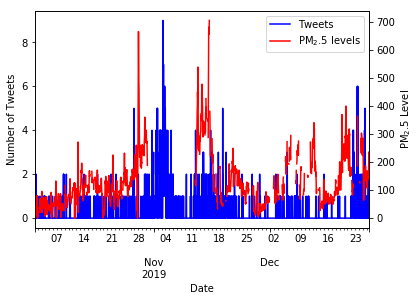

In [86]:
#Lets just plot now
fig, ax = plt.subplots()
y1 = merge.freq.plot(ax=ax, style='b-', label='Tweets')
y2 = merge.value.plot(ax=ax, style='r-', secondary_y=True, label='PM$_2.5$ levels')

y1.set_ylabel("Number of Tweets")
y2.set_ylabel("PM$_2.5$ Level")
y1.set_xlabel("Date")

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

## Word Cloud Analysis

In [94]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
B = pd.read_csv('data/search-results-Jan19-Dec19-Delhi.csv', sep='    ')
B.index = pd.to_datetime(B['Tweet post Date'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


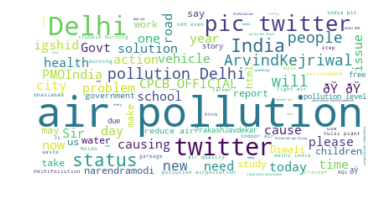

In [96]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https://","https"])
text = " ".join(t for t in B['Tweet text'])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Hashtag Analysis

In [102]:
C = pd.read_csv('data/search-results-Jan19-Dec19-Delhi.csv', sep='    ')
C.index = pd.to_datetime(C['Tweet post Date'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [104]:
C.head(1)

,ï»¿Tweet Permalink,Tweet id,Poster username,Tweet post Date,Tweet text,Number of retweets,Is a retweet
Tweet post Date,,,,,,,
2019-12-30 03:49:02,https://twitter.com/ROOTCARE/status/1211411327...,1211411327614406656,@ROOTCARE,2019-12-30 03:49:02,Shocking News : Air Pollution Kills as Many Pe...,0,No


In [232]:
import re
regex = r"# [a-zA-Z]*"
di = {'Hashtags':[], 'Frequency':[]}
for tweet in C['Tweet text']:
    matches = re.finditer(regex, tweet, re.MULTILINE)
    for match in matches:
        if match[0] in di['Hashtags']:
            i=di['Hashtags'].index(match[0])
            di['Frequency'][i] = di['Frequency'][i]+1
        else:
            di['Hashtags'].append(match[0])
            di['Frequency'].append(1)

In [237]:
#create a dataframe out of dict
x = pd.DataFrame.from_dict(di)


In [244]:
x.sort_values(["Frequency", "Hashtags"], axis=0, ascending=[False,False]).head(20)

,Hashtags,Frequency
96,# pollution,48
1,# AirPollution,36
93,# airpollution,27
63,#,26
47,# Delhi,25
137,# delhi,24
330,# naturelove,23
329,# cleanindia,23
26,# love,22
2,# DelhiPollution,22


In [191]:
#Lets see the highest retweeted tweet
df['Number of retweets'].max()

1333

In [197]:
#Lets play with the original tweet dataframe
x = df[df['Number of retweets']==1333]
x

,ï»¿Tweet Permalink,Tweet id,Poster username,Tweet post Date,Tweet text,Number of retweets,Is a retweet
Tweet post Date,,,,,,,
2019-11-03 15:00:35,https://twitter.com/AdityaRajKaul/status/11909...,1190924223633485825,@AdityaRajKaul,2019-11-03 15:00:35,Today Prime Minister @ narendramodi needs to s...,1333,No


![alt text](images/highestRT.png)

## Most Mentions

In [248]:
D = pd.read_csv('data/search-results-Jan19-Dec19-Delhi.csv', sep='    ')
D.index = pd.to_datetime(C['Tweet post Date'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [249]:
import re
regex = r"@ [a-zA-Z1-9]*"
di = {'Mentions':[], 'Frequency':[]}
for tweet in D['Tweet text']:
    matches = re.finditer(regex, tweet, re.MULTILINE)
    for match in matches:
        if match[0] in di['Mentions']:
            i=di['Mentions'].index(match[0])
            di['Frequency'][i] = di['Frequency'][i]+1
        else:
            di['Mentions'].append(match[0])
            di['Frequency'].append(1)

In [251]:
x = pd.DataFrame.from_dict(di)
x.sort_values(["Frequency", "Mentions"], axis=0, ascending=[False,False]).head(20)

,Mentions,Frequency
4,@ ArvindKejriwal,87
7,@ CPCB,56
1,@ PMOIndia,47
0,@ narendramodi,37
6,@ PrakashJavdekar,26
77,@ myogiadityanath,19
73,@ CeoNoida,17
23,@ AamAadmiParty,15
78,@ dm,14
72,@ Uppcb,14


## Twitter API

In [12]:
import json

In [69]:
import twitter
api = twitter.Api(consumer_key='82fduUCqAZ6uOlMy16yTmmitH',
                  consumer_secret='R5YWxTp3Bf8AI9y50HbMB2JixeNWVzugbfCZAnOPwD4ahND05c',
                  access_token_key='141672563-9zNPiqmznkQfXck9kWlLuAKhAsDmXGxretWuX7uv',
                  access_token_secret='kqLiIqGOQfbRcE8P9Ri05ZhVyAhGIehw62ka5ZX0x5Izg')

In [70]:
print(api.VerifyCredentials())

{"created_at": "Sat May 08 18:10:22 +0000 2010", "description": "Ph.D. Fresher | IIT-Gandhinagar", "favourites_count": 219, "followers_count": 250, "friends_count": 154, "geo_enabled": true, "id": 141672563, "id_str": "141672563", "listed_count": 2, "location": "New Delhi", "name": "Rishiraj Adhikary", "profile_background_color": "352726", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme5/bg.gif", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme5/bg.gif", "profile_banner_url": "https://pbs.twimg.com/profile_banners/141672563/1367244391", "profile_image_url": "http://pbs.twimg.com/profile_images/602493759088041984/It5CvU1c_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/602493759088041984/It5CvU1c_normal.jpg", "profile_link_color": "D02B55", "profile_sidebar_border_color": "829D5E", "profile_sidebar_fill_color": "99CC33", "profile_text_color": "3E4415", "profile_use_background_image": true, "screen_na

In [72]:
results = api.GetSearch(raw_query="q=screen_name=rishihere")

TwitterError: [{'code': 32, 'message': 'Could not authenticate you.'}]

In [51]:
results = api.GetSearch(raw_query="q=air+pollution&count=10000&geocode=28.649765,77.308093,10km")

In [66]:
x=api.User(ScreenName='rishihere')

In [67]:
x

User(ID=None, ScreenName=None)

In [52]:
dfList = []
for result in results:
    json_str = json.dumps(result._json)
    #deserialise string into python object
    parsed = json.loads(json_str)
    jsn = json.dumps(parsed, indent=4, sort_keys=True)
    #create dataframe out of json
    onedf = pd.read_json(jsn)
    dfList.append(onedf)

In [57]:
for i in results:
    print("\n")
    print(i)



{"created_at": "Wed Jan 01 05:34:33 +0000 2020", "hashtags": [], "id": 1212245707454726145, "id_str": "1212245707454726145", "lang": "en", "retweet_count": 262, "retweeted_status": {"created_at": "Tue Dec 31 16:14:11 +0000 2019", "favorite_count": 555, "hashtags": [], "id": 1212044287111811072, "id_str": "1212044287111811072", "lang": "en", "retweet_count": 262, "source": "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>", "text": "Why is no one complaining of air pollution ? The AQI in Delhi at my place is more than 300. Is it only a Deepawali\u2026 https://t.co/phxAZ7dJBi", "truncated": true, "urls": [{"expanded_url": "https://twitter.com/i/web/status/1212044287111811072", "url": "https://t.co/phxAZ7dJBi"}], "user": {"created_at": "Sat Jul 23 09:22:39 +0000 2011", "default_profile": true, "description": "People's Entrepreneur,FounderCEOChief EditorJanKiBaat(@jankibaat1), Political Expert/Activist, Policy Analyst, Columnist,Hosts Lalkar on Rep

In [50]:
onedf.head()

,contributors,coordinates,created_at,entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,...,lang,metadata,place,retweet_count,retweeted,retweeted_status,source,text,truncated,user
hashtags,NaN,NaN,2019-12-31 23:01:18+00:00,[],0,False,NaN,1212146740972773376,1212146740972773376,NaN,...,en,NaN,NaN,233,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @pradip103: Why is no one complaining of ai...,False,NaN
symbols,NaN,NaN,2019-12-31 23:01:18+00:00,[],0,False,NaN,1212146740972773376,1212146740972773376,NaN,...,en,NaN,NaN,233,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @pradip103: Why is no one complaining of ai...,False,NaN
urls,NaN,NaN,2019-12-31 23:01:18+00:00,[],0,False,NaN,1212146740972773376,1212146740972773376,NaN,...,en,NaN,NaN,233,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @pradip103: Why is no one complaining of ai...,False,NaN
user_mentions,NaN,NaN,2019-12-31 23:01:18+00:00,"[{'id': 340814070, 'id_str': '340814070', 'ind...",0,False,NaN,1212146740972773376,1212146740972773376,NaN,...,en,NaN,NaN,233,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @pradip103: Why is no one complaining of ai...,False,NaN
iso_language_code,NaN,NaN,2019-12-31 23:01:18+00:00,NaN,0,False,NaN,1212146740972773376,1212146740972773376,NaN,...,en,en,NaN,233,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @pradip103: Why is no one complaining of ai...,False,NaN


In [60]:
from twitter import *

In [62]:
t = twitter(
    auth=OAuth('141672563-9zNPiqmznkQfXck9kWlLuAKhAsDmXGxretWuX7uv', 'kqLiIqGOQfbRcE8P9Ri05ZhVyAhGIehw62ka5ZX0x5Izg', '82fduUCqAZ6uOlMy16yTmmitH', 'R5YWxTp3Bf8AI9y50HbMB2JixeNWVzugbfCZAnOPwD4ahND05c'))

NameError: name 'OAuth' is not defined

In [ ]:
twitter.